<span style="color:red">

# Tarea 1: Homología Persistente

La siguiente actividad te ayudará a fortalecer los conceptos de homología persistente y filtraciones, y las paqueterías:
* `gudhi` 
* `ripser`
* `giotto-tda`
* `scikit-tda`
* `tadasets`

La actividad está dividida en dos partes: 

1. **Ejercicios de Práctica**: En esta sección se te proporcionarán ejercicios prácticos para que puedas aplicar los conceptos aprendidos en la teoría usando las paqueterías mencionadas.
2. **Caso Práctico:** Aplicar el concepto de homología persistente (diagramas, barcodes, imágenes de persistencia, distancias entre Diagramas) a un conjunto de datos reales. En esta sección se te proporcionará un conjunto de datos y se te pedirá que apliques los conceptos aprendidos para analizarlo y extraer información relevante.

</span>

<span style="color:red">

## 1. Ejercicios de Práctica

En la siguiente sección se te proporcionarán ejercicios prácticos para que puedas:

- Construir filtraciones de bases de datos y graficarlas.
- Construir los diagramas de persistencia de bases de datos, interpretarlas.
- Construir otras visualizaciones de los diagramas de persistencia.
- Comparar diagramas de persistencia utilizando distancias Bottleneck y Wasserstein, e interpretarlas.

</span>

<span style="color:blue">

Integrantes del equipo:

- Jose Luis Canto Abraham A00836974
- Dario Acosta Natividad A01563115
- Carlos Emiliano García Arteaga A00836387
- Diego Alejandro Mendoza Guerrero A01741207
- Pablo Pérez Sandoval A01710355

</span>

In [1]:
# Librerias

import gudhi
import tadasets
import gudhi as gd
import numpy as np
import pandas as pd
import yfinance as yf
from ripser import ripser
import matplotlib.pyplot as plt
from gtda.plotting import plot_diagram
from mpl_toolkits.mplot3d import Axes3D 
from scipy.spatial.distance import pdist
from gtda.diagrams import PersistenceImage
from persim import plot_diagrams, wasserstein
from sklearn.preprocessing import MinMaxScaler
from gtda.homology import VietorisRipsPersistence
from gudhi.wasserstein import wasserstein_distance

/Users/josecanto/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


<span style="color:red">

### Ejercicio 1.1:

Utilizando una nube de puntos construidos con la paquetería `tadasets` por cada tipo en la paquetería  (escoge la dimensión, radio, número de puntos, ruido, etc). Con ayuda de la paquetería `gudhi` construye tres filtraciones (variando el `max_edge_length` y que al menos una filtración corresponda a `max_edge_length`= diámetro del conjunto) de la nube de puntos y grafícalas.

</span>

In [2]:
# Se construyo aleatoriamente los puntos pero los guardamos para que las explicaciones hagan sentido y no cambien cada vez que se corre el código
points = np.array([[ 0.57499218,  0.20911386],
       [-0.01393593,  0.8035559 ],
       [-0.37435074,  2.44005837],
       [-0.23871513,  0.06081295],
       [-0.19662079,  0.14162913],
       [ 0.38114474,  1.46854367],
       [ 0.47127922,  2.75737449],
       [-1.73172845,  1.82258229],
       [-0.92700791,  0.53265339],
       [-0.23006103,  2.88094217],
       [-1.27877327,  1.72940427],
       [-0.4202336 ,  0.74711541],
       [-2.54778836, -1.09584547],
       [-0.80017185, -0.40866618],
       [-0.14654238, -0.020686  ],
       [ 0.44233059,  1.69680908],
       [-1.69471098, -0.36950815],
       [ 0.51952806,  0.87192001],
       [ 0.06045248,  1.47512536],
       [ 0.36695231,  1.21761521]])

Diámetro del conjunto: 4.895


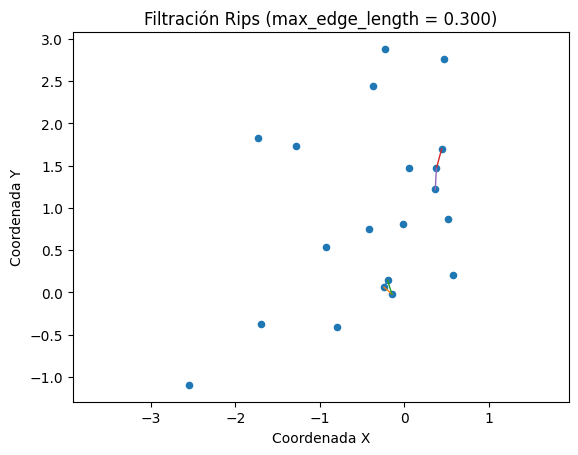

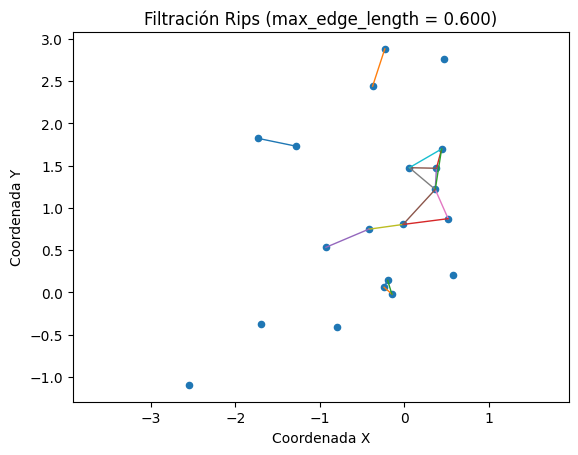

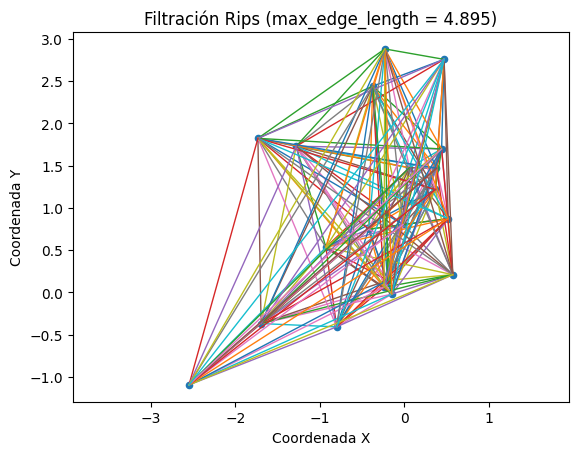

In [3]:
dists = np.linalg.norm(points[:, np.newaxis, :] - points[np.newaxis, :, :], axis=-1)
diameter = np.max(dists)


thresholds = [0.3, 0.6, diameter]

print(f"Diámetro del conjunto: {diameter:.3f}")

# Graficar 1-esqueleto para cada umbral
for thresh in thresholds:
    rips = gudhi.RipsComplex(points=points, max_edge_length=thresh)
    simplex_tree = rips.create_simplex_tree(max_dimension=1)
    edges = [simplex for simplex, filt in simplex_tree.get_filtration() if len(simplex) == 2]

    plt.figure()
    plt.title(f"Filtración Rips (max_edge_length = {thresh:.3f})")
    plt.scatter(points[:, 0], points[:, 1], s=20)
    for edge in edges:
        i, j = edge
        p1, p2 = points[i], points[j]
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], linewidth=1)
    plt.axis('equal')
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.show()

<span style="color:red">

### Ejercicio 1.2: 

Con lo anterior, toma la filtración asociada a `max_edge_length`=diámetro y grafica el diagrama de persistencia.

</span>

Persistencia calculada (dim, (birth, death)):
(1, (1.247377864673213, 1.363151999424074))
(1, (0.7572450705883882, 0.8367781412462527))
(1, (1.0609604196516218, 1.1042589831448386))
(0, (0.0, inf))
(0, (0.0, 1.1502214406880142))
(0, (0.0, 1.120404801262672))
(0, (0.0, 1.0583711796482502))
(0, (0.0, 0.8953957819951117))
(0, (0.0, 0.7318772451297522))
(0, (0.0, 0.7121426246270088))
(0, (0.0, 0.6651227413682356))
(0, (0.0, 0.645458227977872))
(0, (0.0, 0.550285525248899))
(0, (0.0, 0.537826626491114))
(0, (0.0, 0.4638944335884233))
(0, (0.0, 0.4624397674291786))
(0, (0.0, 0.410199129154206))
(0, (0.0, 0.37786840406562505))
(0, (0.0, 0.3207597921609934))
(0, (0.0, 0.25132949907895125))
(0, (0.0, 0.23632351902146886))
(0, (0.0, 0.12303615197845306))
(0, (0.0, 0.0911218327835212))


/Users/josecanto/Library/Python/3.9/lib/python/site-packages/gudhi/persistence_graphical_tools.py:134: UserWarning: usetex mode requires dvipng.
  warnings.warn("usetex mode requires dvipng.")


<Figure size 640x480 with 0 Axes>

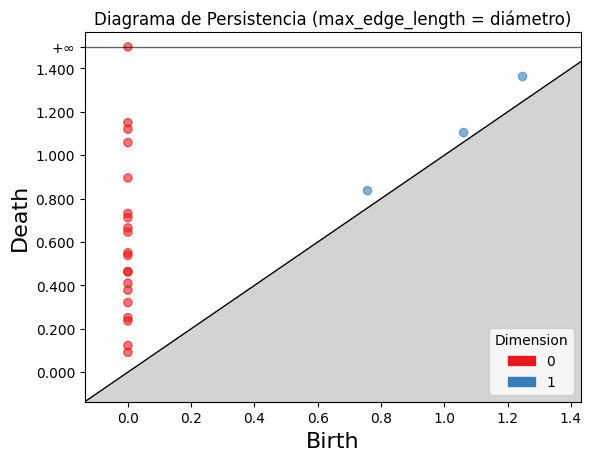

In [4]:
rips_full = gudhi.RipsComplex(points=points, max_edge_length=diameter)
simplex_tree_full = rips_full.create_simplex_tree(max_dimension=2)

# 2) Calcular la persistencia (H0 y H1)
persistence = simplex_tree_full.persistence()
print("Persistencia calculada (dim, (birth, death)):")
for pair in persistence:
    print(pair)

# 3) Graficar el diagrama de persistencia
plt.figure()
gudhi.plot_persistence_diagram(persistence)
plt.title("Diagrama de Persistencia (max_edge_length = diámetro)")
plt.show()

Interpretación de los ciclos

En este caso podemos observar que existen 3 $H_0$ que viven mucho tiempo, pero podemos observar que solo existe uno que se mantiene a lo largo del tiempo.

Mientras que por la parte de los $H_1$ observamos ciertos agujeros, pero que no son muy persistentes y probablemente no sean reales por su cercanía a la diagonal.

<span style="color:red">

### Ejercicio 1.3:

Modifica la visualización de los diagramas de persistencia a:
- Barcode
- Density Plot
- Image of Persistence (necesita `giotto-tda`)
- Persistence Landscape (necesita `giotto-tda`)

</span>

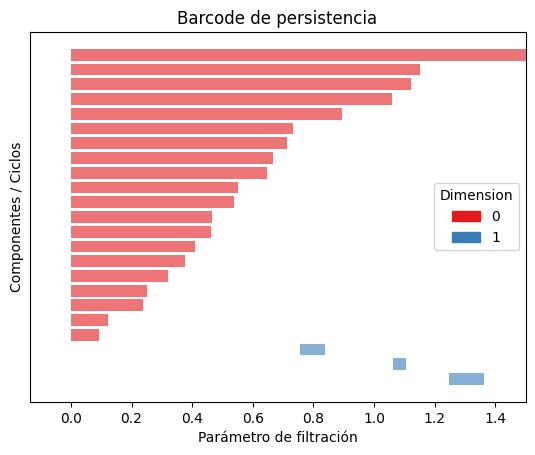

In [5]:
persistence = simplex_tree_full.persistence()

# Dibuja el barcode
gd.plot_persistence_barcode(persistence)
plt.title("Barcode de persistencia")
plt.xlabel("Parámetro de filtración")
plt.ylabel("Componentes / Ciclos")
plt.show()


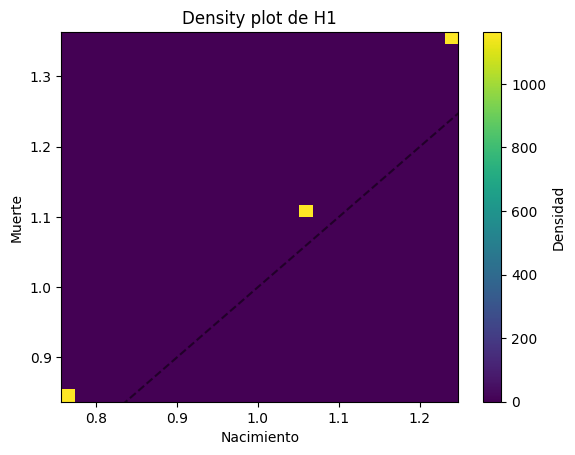

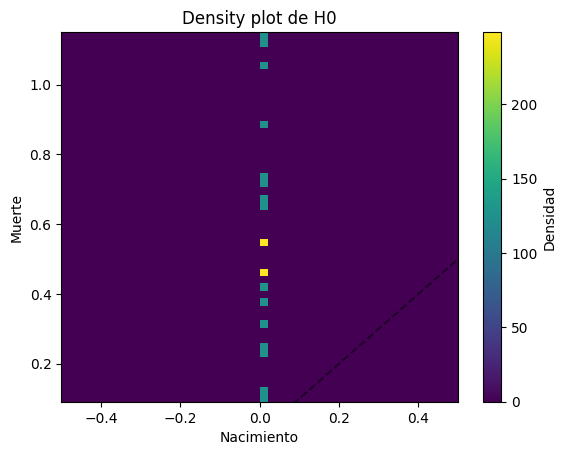

In [6]:
# Extraemos sólo los pares finitos y de dimensión 1
pairs = np.array([pt for dim, pt in persistence if dim == 1 and pt[1] < np.inf])
births = pairs[:, 0]
deaths = pairs[:, 1]

plt.figure()
plt.hist2d(births, deaths, bins=30, density=True)
plt.colorbar(label='Densidad')
plt.title("Density plot de H1")
plt.xlabel("Nacimiento")
plt.ylabel("Muerte")
plt.plot([0, deaths.max()], [0, deaths.max()], 'k--', alpha=0.5)  # línea diagonal
plt.show()


# HO
pairs = np.array([pt for dim, pt in persistence if dim == 0 and pt[1] < np.inf])
births = pairs[:, 0]
deaths = pairs[:, 1]

plt.figure()
plt.hist2d(births, deaths, bins=50, density=True)
plt.colorbar(label='Densidad')
plt.title("Density plot de H0")
plt.xlabel("Nacimiento")
plt.ylabel("Muerte")
plt.plot([0, deaths.max()], [0, deaths.max()], 'k--', alpha=0.5)  # línea diagonal
plt.show()


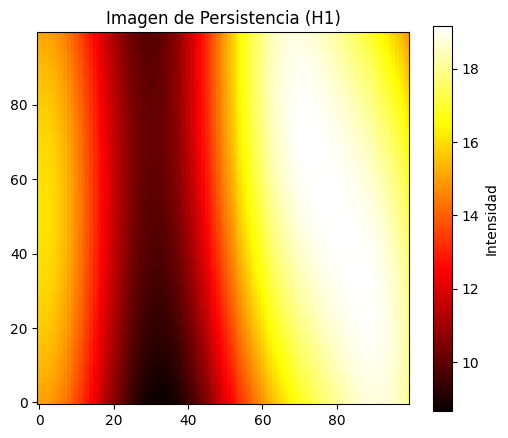

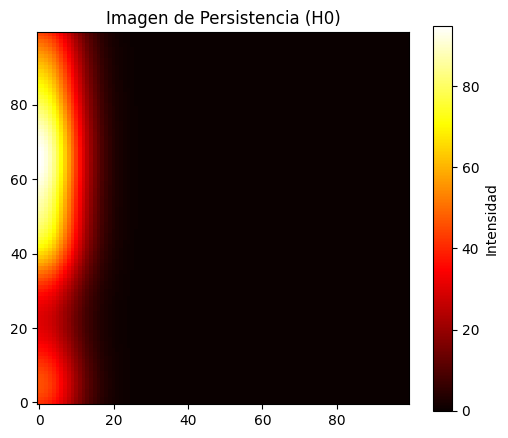

In [7]:
VR = VietorisRipsPersistence(homology_dimensions=[0, 1], n_jobs=-1)
diagrams = VR.fit_transform([points])

PI = PersistenceImage(sigma=0.1, n_bins=100)
images = PI.fit_transform(diagrams)

# ya tienes `images = PI.fit_transform(diagrams)`

# H1 (loops)
plt.figure(figsize=(6,5))
plt.imshow(images[0][1], cmap='hot', interpolation='nearest', origin='lower')
plt.title("Imagen de Persistencia (H1)")
plt.colorbar(label="Intensidad")
plt.show()

# H0 (componentes conexas)
plt.figure(figsize=(6,5))
plt.imshow(images[0][0], cmap='hot', interpolation='nearest', origin='lower')
plt.title("Imagen de Persistencia (H0)")
plt.colorbar(label="Intensidad")
plt.show()


<span style="color:red">

### Ejercicio 1.4: 

Selecciona dos tipos de nubes de puntos y construye sus diagramas de persistencia para dos filtraciones diferentes (parametro `max_edge_length`). Compara los diagramas de persistencia utilizando las distancias Bottleneck y Wasserstein.

Una vez comparado, ¿qué pasa si modificamos el parámetro noise en la generación de los datos? Para esto, utiliza un mismo tipo de nube de puntos y varía el parámetro `noise` en la función `tadasets.make_*`. Compara los diagramas de persistencia utilizando las distancias Bottleneck y Wasserstein. ¿Qué observas? ¿Qué tipo de ruido afecta más a la homología persistente? ¿Por qué?

</span>

Distancia Bottleneck entre círculo y toro: 0.0104
Distancia Wasserstein entre círculo y toro: 0.0181


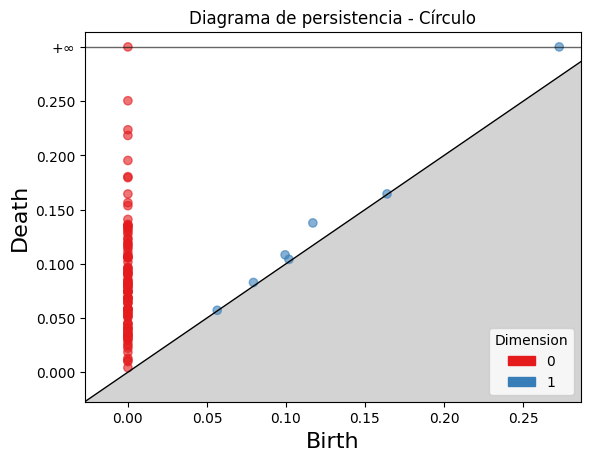

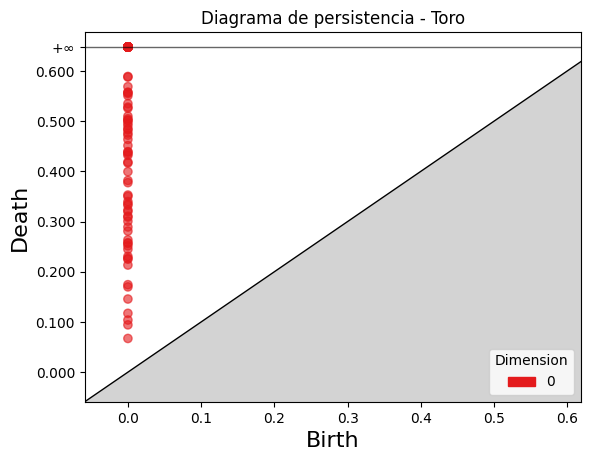

In [8]:
def get_persistence(cloud, max_edge):
    rips_complex = gudhi.RipsComplex(points=cloud, max_edge_length=max_edge)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
    diag = simplex_tree.persistence()
    return diag

def diag_to_array(diag, homology_dim=1):
    # Filtrar por dimensión específica y muerte finita
    diag_filtered = [pair[1] for pair in diag if pair[0] == homology_dim and np.isfinite(pair[1][1])]
    return np.array(diag_filtered)

def plot_persistence_diagram(diag, title):
    gudhi.plot_persistence_diagram(diag)
    plt.title(title)
    plt.show()

cloud_circle = tadasets.dsphere(d=1, n=100, noise=0.05)
cloud_toro = tadasets.torus(n=100, noise=0.05)

max_edge = 0.6

# Calcular diagramas de persistencia
diag_circle = get_persistence(cloud_circle, max_edge)
diag_toro = get_persistence(cloud_toro, max_edge)

# Convertir los diagramas a arrays para dimensión 1 (ciclos)
array_circle = diag_to_array(diag_circle, homology_dim=1)
array_toro = diag_to_array(diag_toro, homology_dim=1)

# Comparar distancias Bottleneck y Wasserstein entre nubes
bottle_dist = gudhi.bottleneck_distance(array_circle, array_toro)
wasser_dist = wasserstein_distance(array_circle, array_toro, order=1)

print(f"Distancia Bottleneck entre círculo y toro: {bottle_dist:.4f}")
print(f"Distancia Wasserstein entre círculo y toro: {wasser_dist:.4f}")

# Visualizar diagramas de persistencia
plot_persistence_diagram(diag_circle, "Diagrama de persistencia - Círculo")
plot_persistence_diagram(diag_toro, "Diagrama de persistencia - Toro")

<span style="color:red">

## 2. Caso Práctico:


### Ejercicio 2.1
Con las siguientes bases de datos, aplica los conceptos de homología persistente (diagramas, barcodes, imágenes de persistencia, distancias entre Diagramas) para inferir su forma. Una vez hecho tu análisis, proporciona cuales son las características que observaste en cada una de las bases de datos.


</span>

In [9]:
act1 = pd.read_csv("Activity1.csv")
act2 = pd.read_csv("Activity2.csv")
act3 = pd.read_csv("Activity3.csv")

In [10]:
scaler = MinMaxScaler()
data = [scaler.fit_transform(act1), scaler.fit_transform(act2), scaler.fit_transform(act3)]

In [11]:
#Diagramas de persistencia
VR = VietorisRipsPersistence(homology_dimensions=[0, 1])
diagrams = VR.fit_transform(data)

In [12]:
# Act1
plot_diagram(diagrams[0], homology_dimensions=[0, 1])

In [13]:
# Act2
plot_diagram(diagrams[1], homology_dimensions=[0, 1])

In [14]:
# Act3
plot_diagram(diagrams[2], homology_dimensions=[0, 1])

Analísis de los diagramas de persistencia: 

Activity 1: El diagrama muestra la evolución de los datos a medida que varía un parámetro. La mayoría de los puntos rojos (H0) nosa indican la aparición y desaparición rápida de componentes conexa. Por otro lado, los puntos verdes (H1) representan ciclos y tienen una persistencia considerable. Las características alejadas de la diagonal son las más importantes y las cercanas pueden ser consideradas como ruido.

Activity 2: En el segundo diagrama, al igual que en el primero podemos ver la aparición y desaparición de componentes conexas rapidamente, en este segundo diagrma las bolas verdes muestran una clara persistencia, ya que muchos de ellos están alejados de la diagonal, esto nos muestra que existen estructuras cíclicas bien definidas en los datos.

Activity 3: Es igual que el activity 2, estos ultimos dos nos muestran que a diferencia del perimer diagrama, estos dos tienen más cilocs bien estructurados en los datos, aunque en el primero los ciclos se concentran más cerca de la diagonal, tenemos un ciclo muy alejado a la diagonal, lo que nos habla de una presencia de uno o pocos bucles dominantes, mientras que en los diagramas 2 y 3 se tiene una mayor distribución en los ciclos.

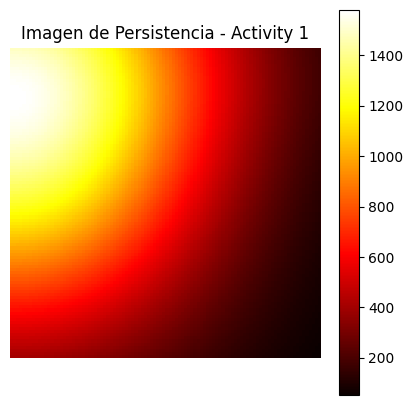

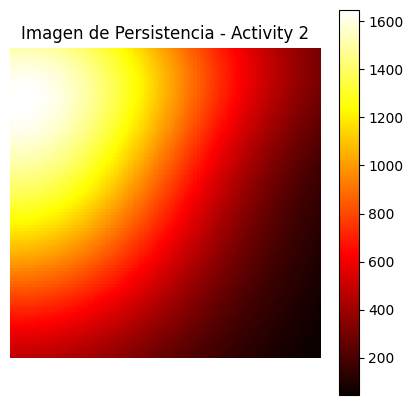

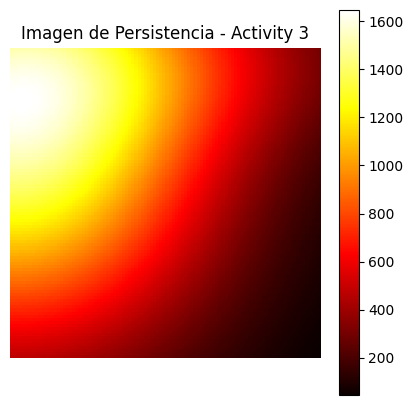

In [15]:
# Imagenes de persistencia
PI = PersistenceImage()
PI.set_params(sigma=0.1, n_bins=100)

persistence_images = PI.fit_transform(diagrams)

titles = ['Activity 1', 'Activity 2', 'Activity 3']

for i, img in enumerate(persistence_images):
    combined_img = np.sum(img, axis=0) #h0 + h1
    plt.figure(figsize=(5, 5))
    plt.imshow(combined_img, cmap='hot', origin='lower')
    plt.colorbar()
    plt.title(f'Imagen de Persistencia - {titles[i]}')
    plt.axis('off')
    plt.show()

Analísis imagenes de persostencia

Las imagenes de persistencia dieron todas iguales. Estas imagenes nos muestra una alta concentración de características con nacimiento temprano y baja persistencia, lo que nos dice que la mayoría de las estructuras en los datos son transitorias y tiene ruido. La concentración en la esquina izquierda esporque seguramente no tiene ciclos persistentes. Dado que las tres imagenes dan igual, es posible que los conjuntos de datos sean muy similares en su estructura topológica, donde todos compartan un patrón repetido sin diferencias significativas.

In [16]:
# Distancias  de wasserstein
d01 = wasserstein_distance(diagrams[0], diagrams[1])
d02 = wasserstein_distance(diagrams[0], diagrams[2])
d12 = wasserstein_distance(diagrams[1], diagrams[2])

print("Distancia Activity1 - Activity2:", d01)
print("Distancia Activity1 - Activity3:", d02)
print("Distancia Activity2 - Activity3:", d12)

Distancia Activity1 - Activity2: 1.3683704267023131
Distancia Activity1 - Activity3: 1.3683704267023131
Distancia Activity2 - Activity3: 0.0


Interpretación distancias de wasserstein

Activity2 y Activity3 probablemente contienen datos con patrones topológicos idénticos.

Activity1 es distinta en su estructura, lo cual podría indicar una actividad diferente en términos de movimientos, ciclos, o conectividad.

<span style="color:red">

### Ejercicio 2.2: Caídas en la Bolsa de Valores

Utilizaremos la homología persistente y la distancia de Wassertein para determinar años en los que la bolsa de valores tuvo un comportamiento atípico (caída).

</span>

<span style="color:red">

Obtenemos los datos, que pertenecen a una serie de tiempo, y las convertimos en una nube de puntos utilizando un encaje.

</span>

<span style="color:red">

Crea una función que calcule los diagramas de persistencia dado un conjunto de datos (dataframe o numpy) variable. Puedes ayudarte de las paqueterías `ripser`. La función debe tener:

Inputs:
- `data`: dataframe o numpy array con los datos a analizar

Outputs:
- `diagrams`: lista de diagramas de persistencia

</span>

<span style="color:red">

Crea una función que calcule la distancia de Wasserstein entre dos diagramas de persistencia asociados a ventanas de encaje distinto. La función debe tener:

Inputs:
- `data`: dataframe o numpy array con los datos a analizar.
- `window_size`: tamaño de la ventana de encaje.
- `delay`: espaciamiento entre observaciones para el encaje.
- `dim`: dimensión en la que se va a encajar.

Output: 
- `distance`: distancia de Wasserstein entre los diagramas de persistencia.

</span>

<span style="color:red">

Utiliza las funciones anteriores para visualizar el encaje de los datos y la distancia de Wasserstein entre los diagramas de persistencia. Puedes graficar la distancia de Wasserstein en función del tiempo para observar si hay caídas en la bolsa de valores.

Utiliza los siguientes parámetros para tu análisis:

```python
ticker = "AAPL"  # Example stock ticker (Apple Inc.)
start_date = "2015-01-01"
end_date = "2022-01-01"
window_size = 100  # Number of data points in each sliding window
delay = 2
dim = 3
```

Prueba con otro ticker de tu elección y determina si hay caídas en la bolsa de valores.

</span>

In [17]:
def fetch_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)

    if 'Adj Close' in data.columns:
        prices = data['Adj Close']
    elif 'Close' in data.columns:
        prices = data['Close']
    else:
        raise ValueError("No se encontró columna 'Adj Close' ni 'Close' en los datos descargados.")
    if len(prices) < 2:
        raise ValueError("No se descargaron suficientes datos para calcular retornos.")

    log_returns = np.log(prices[1:].values / prices[:-1].values)  # Calculate log-returns
    return log_returns, prices.index[1:]


def embed_time_series(data, delay, dim):
    n_points = len(data) - (dim - 1) * delay
    if n_points <= 0:
        raise ValueError("Embedding parameters (delay, dim) result in insufficient points.")
    embedded = np.zeros((n_points, dim))  # Initialize an empty array with the correct dimensions
    for i in range(dim):
        # Flatten data before assigning to embedded[:, i]
        embedded[:, i] = data[i * delay:i * delay + n_points].flatten()
    return embedded


def persistence_diagram(data):
    diagrams = ripser(data)['dgms']
    return diagrams


def wasserstein_over_time(data, window_size, delay, dim):
    distances = []
    for i in range(len(data) - window_size - 1):
        window1 = data[i:i+window_size]
        window2 = data[i+1:i+1+window_size]

        emb1 = embed_time_series(window1, delay, dim)
        emb2 = embed_time_series(window2, delay, dim)

        dgm1 = persistence_diagram(emb1)
        dgm2 = persistence_diagram(emb2)

        # Usamos H1 si está disponible, sino H0
        d1 = dgm1[1] if len(dgm1) > 1 and len(dgm1[1]) > 0 else dgm1[0]
        d2 = dgm2[1] if len(dgm2) > 1 and len(dgm2[1]) > 0 else dgm2[0]

        distance = wasserstein(d1, d2)
        distances.append(distance)
    return distances


def visualize_embedding_3d(embedded_data, delay, title="3D Time Delay Embedding"):
    """
    Visualize a 3D time delay embedding.

    Parameters:
        embedded_data (np.array): The embedded data with shape (n_points, 3).
        delay (int): The time delay used for the embedding.
        title (str): Title of the plot.
    """
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the embedded data
    ax.plot(embedded_data[:, 0], embedded_data[:, 1], embedded_data[:, 2], 'b-', linewidth=0.5, label='Embedding Curve')
    ax.scatter(embedded_data[:, 0], embedded_data[:, 1], embedded_data[:, 2], c='r', s=10, label='Data Points')

    # Add labels and title
    ax.set_title(title)
    ax.set_xlabel("x(t)")
    ax.set_ylabel(f"x(t + {delay})")
    ax.set_zlabel(f"x(t + {2 * delay})")

    # Add a legend
    ax.legend()

    # Show the plot
    plt.show()


def visualize_results(log_returns, dates, wasserstein_distances):
    # Plot time series
    plt.figure(figsize=(14, 6))
    plt.subplot(2, 1, 1)
    plt.plot(dates, log_returns, label="Log Returns", color="blue")
    plt.title("Time Series (Log Returns)")
    plt.xlabel("Date")
    plt.ylabel("Log Returns")
    plt.legend()
    plt.grid()

    # Plot Wasserstein distances
    plt.subplot(2, 1, 2)
    plt.plot(dates[:len(wasserstein_distances)], wasserstein_distances, label="Wasserstein Distance", color="orange")
    plt.title("Wasserstein Distance Evolution")
    plt.xlabel("Date")
    plt.ylabel("Wasserstein Distance")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

ticker = AAP
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


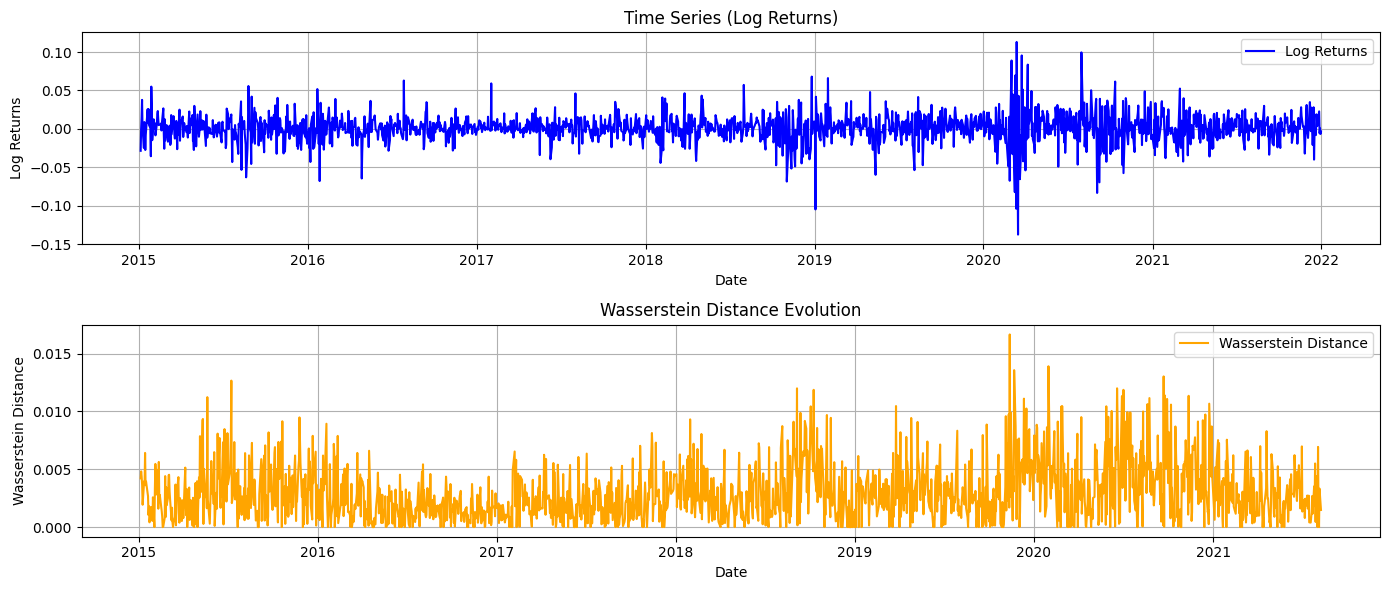

In [18]:
# Parámetros
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2022-01-01"
window_size = 100
delay = 2
dim = 3

print("ticker = AAP")

# Obtener datos
log_returns, dates = fetch_data(ticker, start_date, end_date)

# Calcular distancias de Wasserstein
wasserstein_distances = wasserstein_over_time(log_returns, window_size, delay, dim)

# Resultados
visualize_results(log_returns, dates, wasserstein_distances)

ticker = Tesla


[*********************100%***********************]  1 of 1 completed


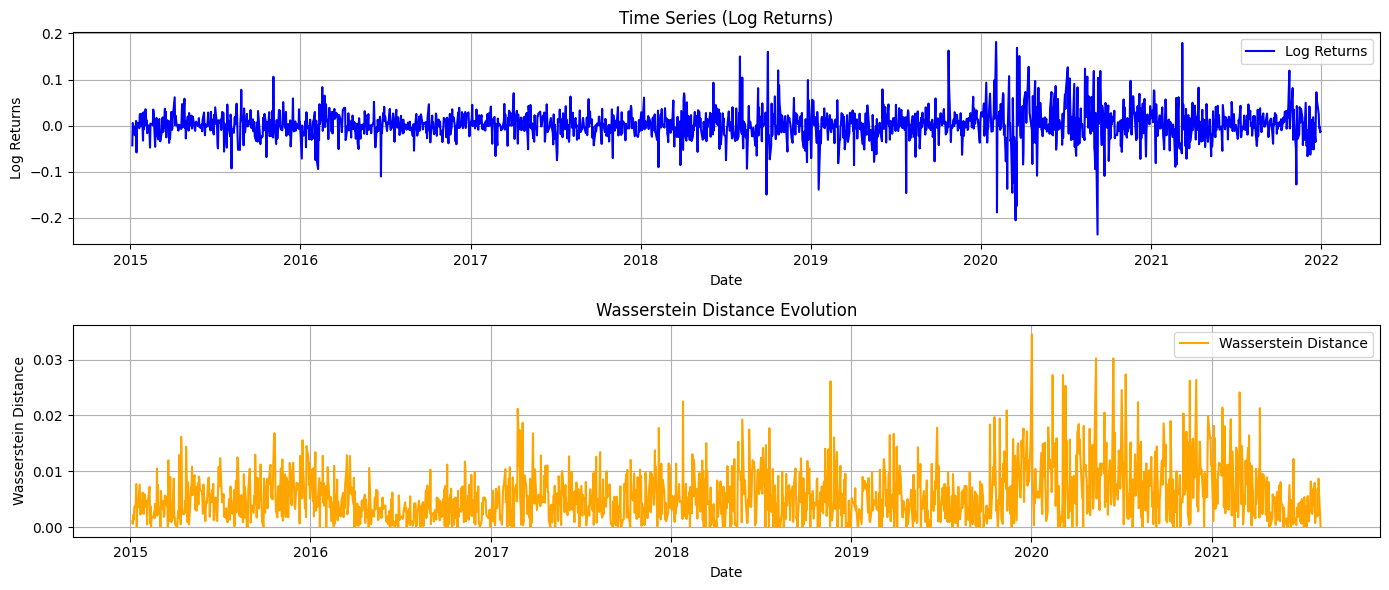

In [19]:
# Ejemplo 2
# Parámetros
ticker = "TSLA"
start_date = "2015-01-01"
end_date = "2022-01-01"
window_size = 100
delay = 2
dim = 3

print("ticker = Tesla")

# Obtener datos
log_returns, dates = fetch_data(ticker, start_date, end_date)

# Calcular distancias de Wasserstein
wasserstein_distances = wasserstein_over_time(log_returns, window_size, delay, dim)

# Resultados
visualize_results(log_returns, dates, wasserstein_distances)

Interpretación de stock de apple:

La distancia de wasserstein captó muy bien los cambios en la estructrua de los datos del comportamiento de los precios de Apple, podemos ver la crisis del covid-19. Además, anticipa sutilmente algunos cambios bruscos en los precios al detectar inestabilidad antes de que se vea en la serie de precios.